# Bearing Sizing and Evaluation

Author: Elias Aoubala

Date: 27/12/2024

In [4]:
import numpy as np
import handcalcs.render
import pandas as pd
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from rocketcea.cea_obj_w_units import CEA_Obj

## 1 - Background

This document describes the sizing and selection of the bearings used in the Mermaid man and Barnacle Boy Turbopumps.

I brief, based on intial mechanical assmebly, the following bearing arrangement has been selected:

- 2 x radial contact bearings on Pump side: SKF 7202
- 1 x Deep Groove Ball Bearing on Turbine Side: SKF 6004

An analysis is intially performed on the mechanical losses induced by the bearing driving the required turbine power of the system in section &sect;2.
Section &sect;3 covers the analysis and design of the mechanical fits for the bearings accordingly.

## 2 - Mechanical Load Analysis

### 2.1 - Pump Loads

#### 2.1.1 - Axial load

For the axial load induced by the impeller, as we are using a fully open impeller design, we can perform an extremely simple calculation for the axial thrust required for the impeller.

$F = \Delta P A_{blade}  N$

where $\Delta P$ refers the pressure rise across the impelelr, A_{blade} the area of each blade in the axial direction and N the number of blades we will be using.



In [5]:
%%render sci_not

D_2 = 74.51e-3 # m

D_1 = 4.14e-3 # m

t = 5e-3 # m

delta_P = 20e5 # Pa

N = 5

A_block =  (D_2 - D_1)*t*N/2  # m**2

F_pa = delta_P * A_block




<IPython.core.display.Latex object>

#### 2.1.2 - Radial Load

For calculating the radial load the following assumption has been used [source](https://www.ijert.org/research/radial-thrust-in-a-single-volute-centrifugal-pump-IJERTV7IS080097.pdf)

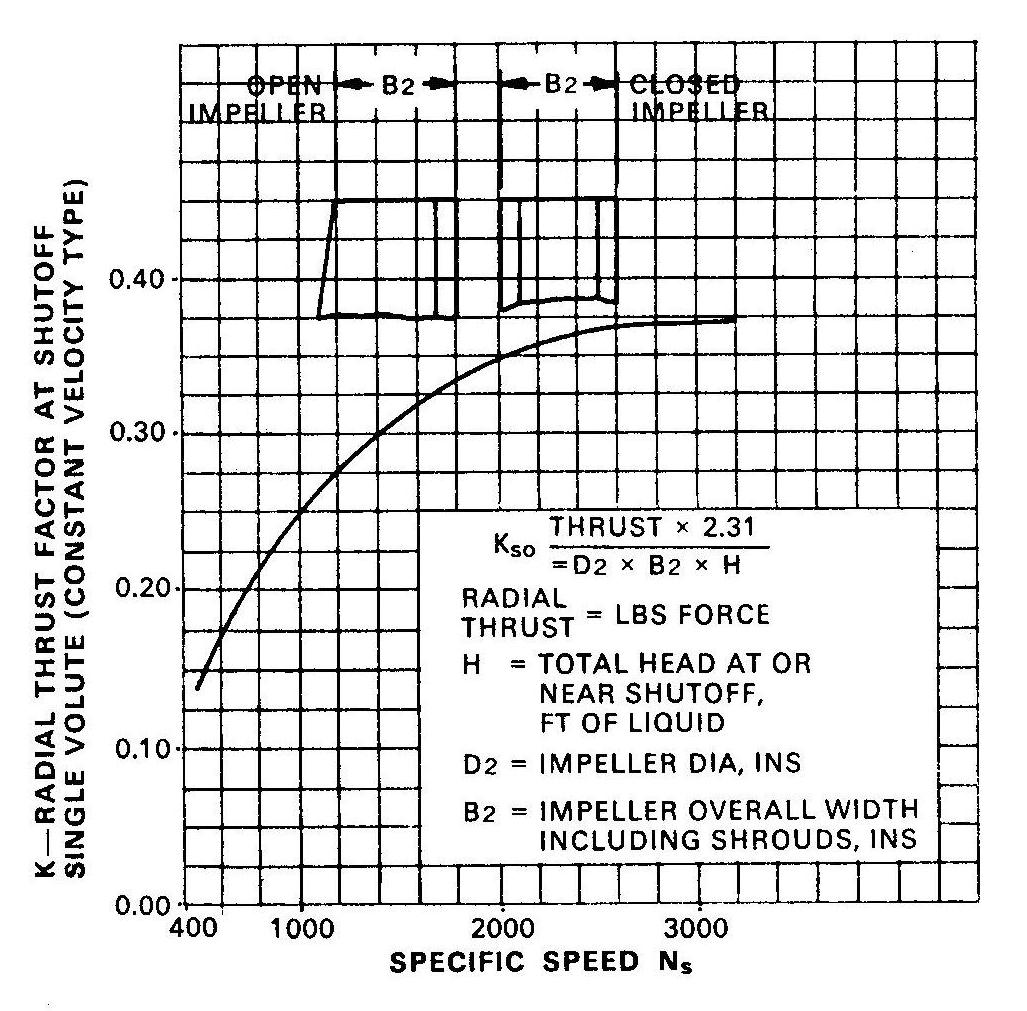

The main equation for calculating the radial thrust induced by the impeller is the following:

$F = K P D_2 B_2$

Where K is an empirical coefficient that ranges between 0.09 to 0.38, P is the pressure at the exit of the impeller, D_2 is the outerdiameter of the impeller and B_2 is the outer width of the impeller

Based on the above graph we can see that for most low specific speed pumps the radial thrust coefficient is quite low for our specific application. In this case, we can assume a value of 0.4 to be conservative.



In [6]:
%%render sci_not

K = 0.4

P = 50e5 # Pa

D_2 = 74.51e-3 # m

B_2 = 5.14e-3 # m

F_pr = K * P * D_2 * B_2 # N

<IPython.core.display.Latex object>

### 2.2 - Turbine Loads

#### 2.2.1 - Axial Loads

The axial load induced on the turbines can be described simply by the pressure differential across the turbine caused by the expansion. This is dependent on the radius and size of the blisk.

We can only consider the downstream pressure of the BLISK to be conservative here, based on the nominal expansion.

In [7]:
%%render sci_not

R_t = 7

P_down = 25e5/R_t

D_t = 14e-2

F_ta = P_down * np.pi * (D_t/2)**2

<IPython.core.display.Latex object>

#### 2.2.2 - Radial Loads

The radial load induced on the turbine can be roughly approximated as being due to the force induced on the edge of the blisk of the turbine.

This can be calculated by considering the torque produced by the impeller at the blade height, from which we can back calculate a radial load the bearing must take.

This is just an approximation at this point.

To estimate this, we can consider simply the torque produced by the turbine, then using the mean dimater, compute the radial load applied onto the shaft.

In [8]:
%%render

tau_turbine = 2.7 # Nm

D_m = 0.10

F_tr = tau_turbine / (D_m/2) 

<IPython.core.display.Latex object>

### 3 - Overall Axial and Radial Load

Based on the analysis conducted for both the turbine and the pump, the following axial and radial loads have been evaluated.

An additional margin of 20% has been taken for conservatism and account for modelling errors.

In [9]:
%%render params

F_a = (F_ta - F_pa)*1.2 # N

F_r = (F_tr + F_pr)*1.2 # N

<IPython.core.display.Latex object>

We can now use these values for the comutation of the frictional losses and bearing life for the turbopump.

### 4 - Evaluation of Bearing Losses and Bearing Life

The following key parameters have been assumed

- LGMT 2 Lithium Lubrication is used
- Bearing Temperature is 70 C

Based on this, the following results have been acquired

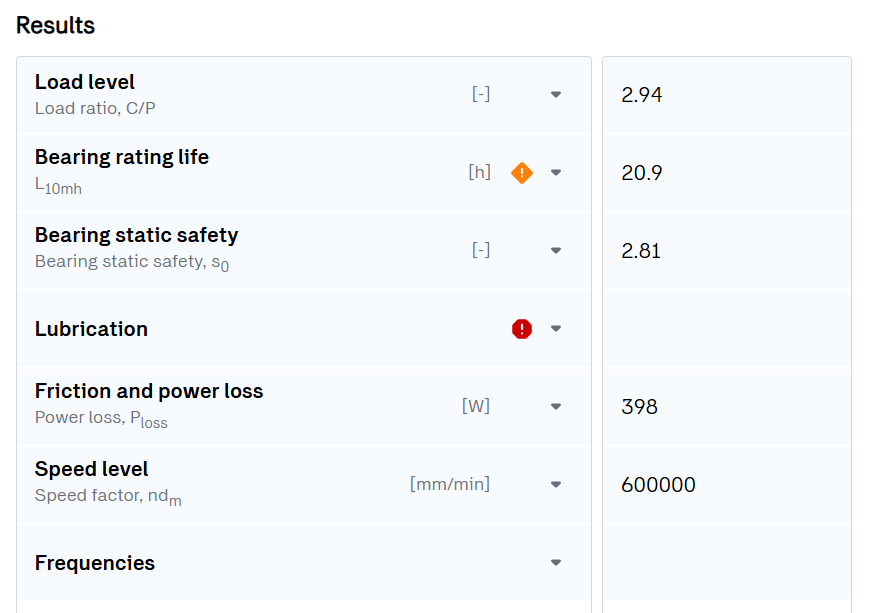

The bearing rated life was beyon the expectation use case for the turbopump (minutes at max), and thus this was considered acceptable.

Finally, the bearing power was within reasonable expectation.

### 5 - Conclusion

In conclusion, the `7202 BEP` from SKF was suitable for our application as the main bearing for use.

In addition, a list of the key information has been presented below:

| Parameter               | Value   |
| ----------------------- | ------- |
| Number of Bearings      | 2       |
| Bearing Losses          | 398 W   |
| Bearing Lifetime        | 20.9 hr |
| Total Mechanical Losses | 1.592 kW |

## 3 - Mechanical Fit Analysis

In this section we cover the mechanical fit analysis for the turbopump. Where possible ISO 2768-1 Medium Tolerances will be used as listed below:

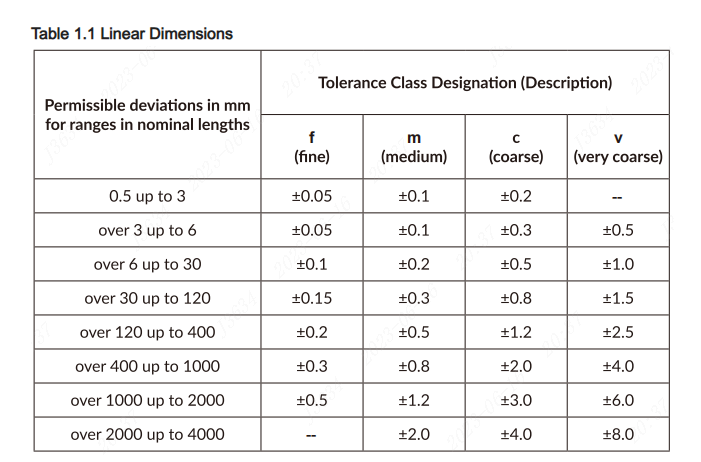

### 3.1 - Determination of Interference Locations

For bearings, depending on the operating condition, deciding what needs to be a interference fit and what needs to be a clearance fit is entirely dependent on the mechanical loads direction of the bearings.

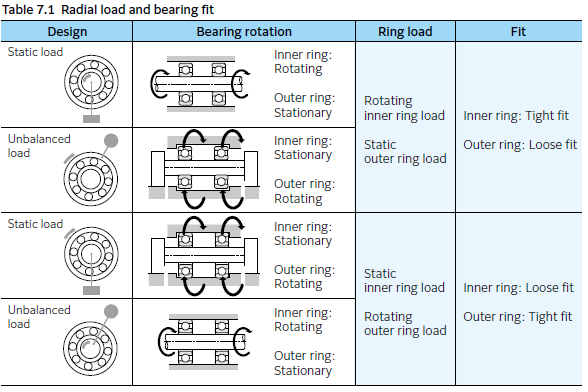

As can be seen, ite entirely depends on where the relative load is being applied.

In our case, we have assumed no unbalanced mass (hence no radial unbalance load), and thus the radial load is fixed relative to the outer bearing (as the radial loads is induced by pump exit and turbine applied forced which are fixed relative to the outer race).

This thus means that the general fit we should aim for is the following:

- Inner-race: Interference Fit
- Outer-race: Clearance Fit


### 3.2 - Determination of Nominal Bearing Interference Fits

For the interference fits between the shaft and the bearings, there is a handy reference table which specifies the general dimensional [tolerance bands](https://www.nodeshk.com/skf/art/skf-bearing-fits.html) we can expect for the bearings.

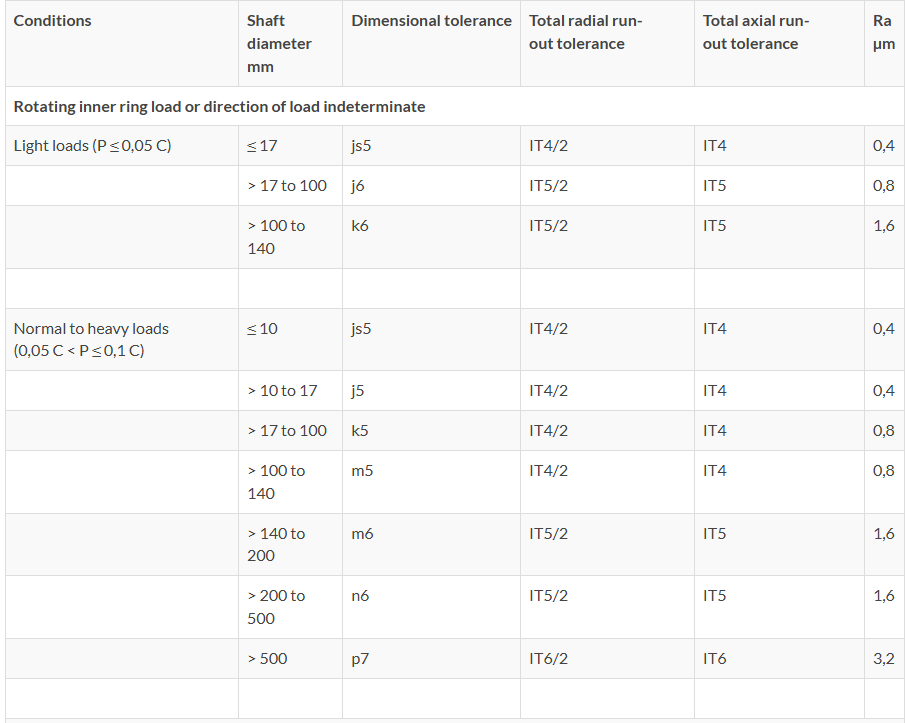

To us this table, we must firstly evaluate for what the ratio of the radial force applied on the bearings to the dynamic load rating of the bearings is. We will do this for both sets of bearings we use:

In [10]:
%%render params sci_not

C_7202 = 8.32e3 # N

C_6004 = 5e3 # N

<IPython.core.display.Latex object>

We can then use our pre-evaluated radial loads we calculated for section &sect;2 to figure out what the ratio to radial foce would be accordingly. We will assume the radial load is split such that the majority of the load is taken by the front bearings (7202) and the rear bearings take the rest of the load.

This has been evaluated based on a preliminary analysis done using the python package `ROSS` which had the following radial load distribution:

In [18]:
%%render

P_1_7202 = 1100 # N

P_2_7202 = 545 # N

P_3_6004 = 80 # N

<IPython.core.display.Latex object>

From here, we can evaluate the ratios for each of these bearings:

In [21]:
%%render

P_C_1 = P_1_7202/C_7202

P_C_2 = P_2_7202/C_7202

P_C_3 = P_3_6004/C_6004

<IPython.core.display.Latex object>

We can see that the first two bearings are in the normal-to-heavy tolerance range, while the third rear bearing on the turbine range is on the low-force level range.

From this, we can specify what the shaft diameter of each of these bearings to thus evaluate for the tolerance class of the bearing. We will use [an online look up table](https://www.tribology-abc.com/calculators/iso_shafts.htm) to identify what these tolerance classes imply in physical dimetnsions

| Bearing           | Bearing Model | Nominal Shaft Diameter | Dynamic Load Ratio (P/C) | Required Tolerance Class | Tolerance Bounds |
| ----------------- | ------------- | ---------------------- | ------------------------ | ------------------------ | ---------------- |
| Pump Bearing 1    | SKF 7202      | 15 mm                  | 0.132                    | j5                       | + 5 / -3 um      |
| Pump Bearing 2    | SKF 7202      | 15 mm                  | 0.066                    | j5                       | + 5 / -3 um      |
| Turbine Bearing 1 | SKF 6004      | 20 mm                  | 0.016                    | j6                       | + 5 / -4 um      |

From these tolerance classes for the shaft, we can get an idea of the level of interference that is achievable nominally for these bearings:

[**SKF 7202**](https://www.skf.com/in/products/rolling-bearings/ball-bearings/angular-contact-ball-bearings/single-row-angular-contact-ball-bearings/productid-7202%20BEP)

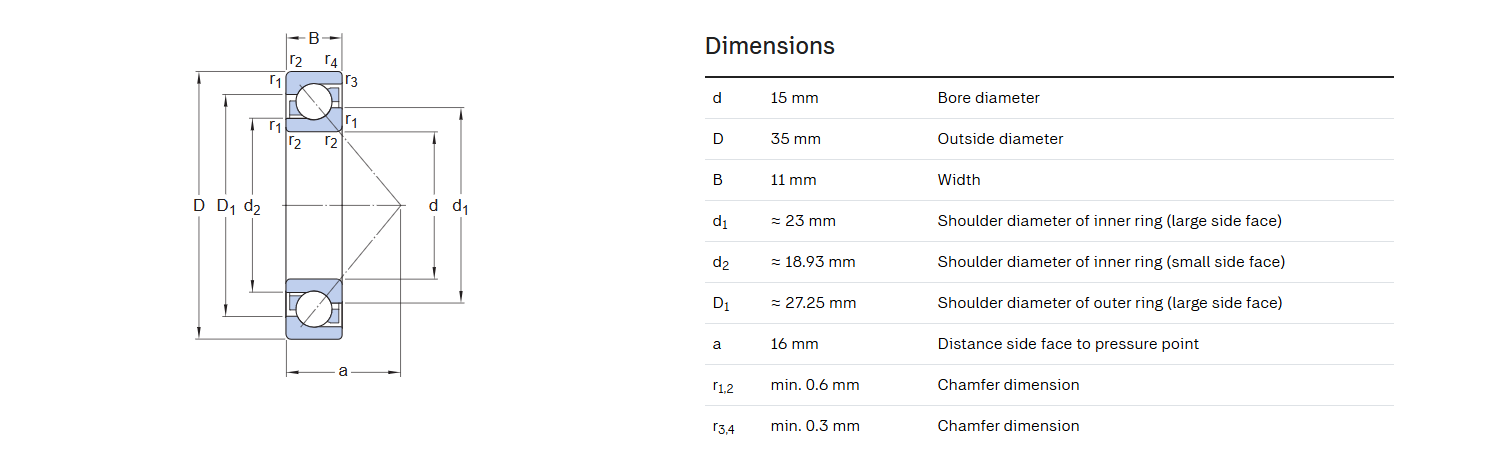

[**SKF 6004**](https://www.skf.com/uk/products/rolling-bearings/ball-bearings/deep-groove-ball-bearings/productid-6004)

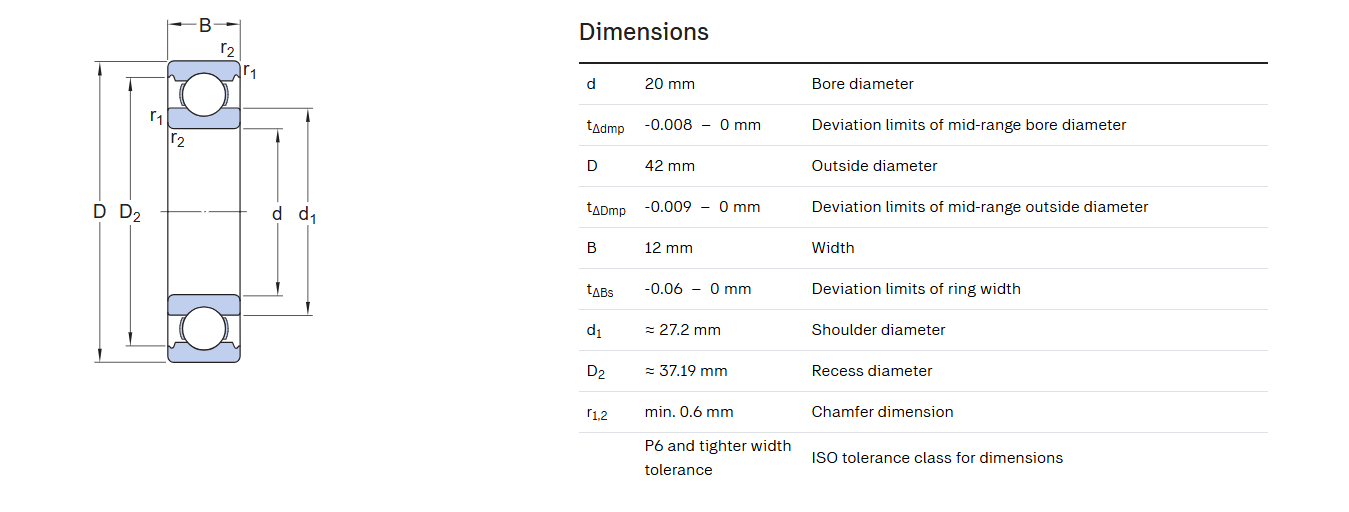

From this, the levels of interference expected for the bearings inner race are the following:

| Bearing            | Model    | Maximum Clearance | Maximum Interference |
| ------------------ | -------- | ----------------- | -------------------- |
| Pump Bearing 1     | SKF 7202 | 3 um              | 13 um                |
| Pump Bearing 2     | SKF 7202 | 3 um              | 13 um                |
| Turbiner Bearing 1 | SKF 6004 | 4 UM              | 13 um                |

### 3.3 - Determination of Nominal Bearing Outer Housing Clearance Fits

For the clearance fits on the outer race, we evaluate for the tolerance classes similarly to how we had done before - but for the cases where the outer ring load is stationary.
We refer to the [same website](https://www.nodeshk.com/skf/art/skf-bearing-fits.html) as used before to look up the recommended tolerances for our use case.

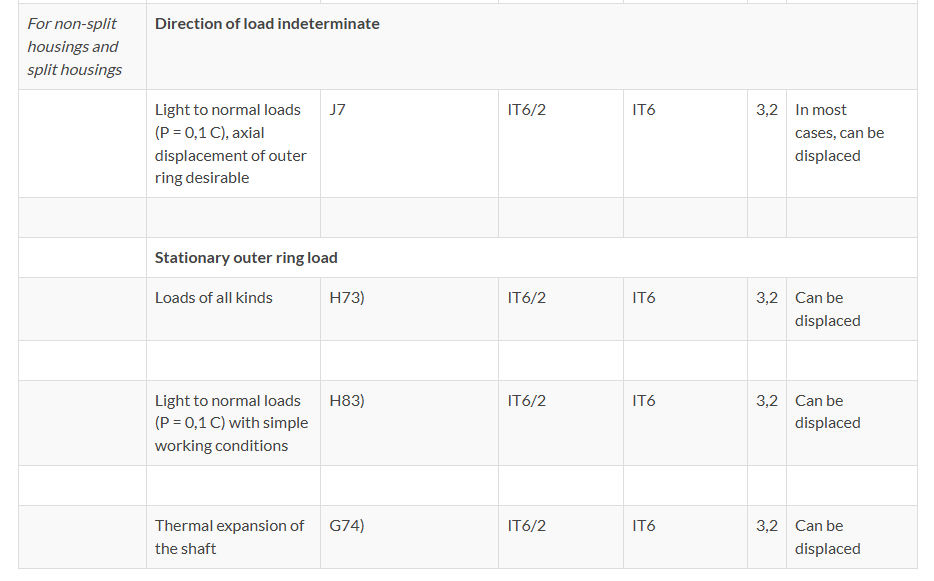

We can thus convert these tolerance classes for our bearings into appropriate sizing of the housing. We will use [this table](https://www.tribology-abc.com/calculators/iso_holes.htm) for the specification of the hole tolerances accordingly.


| Bearing           | Bearing Model | Nominal Housing Diameter | Dynamic Load Ratio (P/C) | Required Tolerance Class | Tolerance Bounds |
| ----------------- | ------------- | ---------------------- | ------------------------ | ------------------------ | ---------------- |
| Pump Bearing 1    | SKF 7202      | 35 mm                  | 0.132                    | H8                       | + 39 / -0 um      |
| Pump Bearing 2    | SKF 7202      | 35 mm                  | 0.066                    | H8                       | + 39 / -0 um      |
| Turbine Bearing 1 | SKF 6004      | 42 mm                  | 0.016                    | H8                       | + 39 / -0 um      |

From this, the levels of interference expected for the bearings inner race are the following:

| Bearing            | Model    | Maximum Clearance | Maximum Interference |
| ------------------ | -------- | ----------------- | -------------------- |
| Pump Bearing 1     | SKF 7202 | 48 um              | 0 um                |
| Pump Bearing 2     | SKF 7202 | 48 um              | 0 um                |
| Turbiner Bearing 1 | SKF 6004 | 48 um              | 0 um                |

### 3.4 - Manufacturing Considerations

Although we have evaluates for the ideal bearing fits for the system, we must consider what is reasonably feasible within our manufacturing constraints.

#### 3.4.1 - Maximum Manufacturing Tolerances


With the available CNC shops, high tolerance dimensional specification will be challening. Based on a preliminary search - the tightest tolerance class we have identified is +/- 0.05 mm (+/- 50 um).

This is significantly larger than the tolerance and thus will require a augmentation of approach on how we deal with the tolerancing for both the shaft and the outer housing of the bearings.

#### 3.4.2 - Press-fit Assembly Requirements

Due to assembly limitations, limited press fit force will be available. Thus evaluation of the press fit force is required to be performed to allow us to drive an interference spec that is within our tolerances for the bearing shaft.

Press fit loading force is evaluated by calculating the contact pressure between the two components first [here](https://www.hlc-metalparts.com/news/press-fit-a-comprehensive-guide-80325696.html), from which a press fit force can be evaluated based on the contact pressure, applied press fitting area and the coefficient of friction between the two components during the press fit.

$$p = \frac{\delta}{d} \frac{E}{1 - \nu^2}$$

Where:
- $p$: Contact Pressure (Pa)
- $d$: Nominal Interface Diameter (m)
- $\delta$: Level of Interference (m)
- $E$: Modulus of Elasticity of the material (Pa)
- $\nu$: Poisson's ratio of the material (n.a.)

We can then use this contact pressure to then evaluate for the required press fitting force for the assembly using the following relationship:

$$F = p A \mu$$

Where:
- $p$: Contact Pressure (Pa)
- $A$: Area of the Interference ($L\pi d$) (m^2)
- $\mu$: Coefficient of Friction of the Fit

Based on [this calculator](https://www.tribology-abc.com/calculators/e3_8.htm), we can see that tthe coefficient of frction for steel-on-steel fits installed when dry is stypically in the range of 0.1 to 0.15.

For the following calculation, we will assume 0.15.

Properties for the shaft (SS 304) have been assumed and used for the design of the interference fit. These have been sourced form [Matweb](https://www.matweb.com/search/datasheet.aspx?MatGUID=abc4415b0f8b490387e3c922237098da&ckck=1).

| Property               | Value   |
| ---------------------- | ------- |
| Modulus of Elasiticity | 193 GPa |
| Poisson's Ratio        | 0.29    |

Based on these values, we can conduct an analysisfor both of these bearings to get an idea of the required force that would be needed for this interference fit.

In [25]:
%%render params sci_not

E_shaft = 193e9 # Pa
v = 0.29

<IPython.core.display.Latex object>

##### 3.4.2.1 - Pump Bearings: SKF 7202

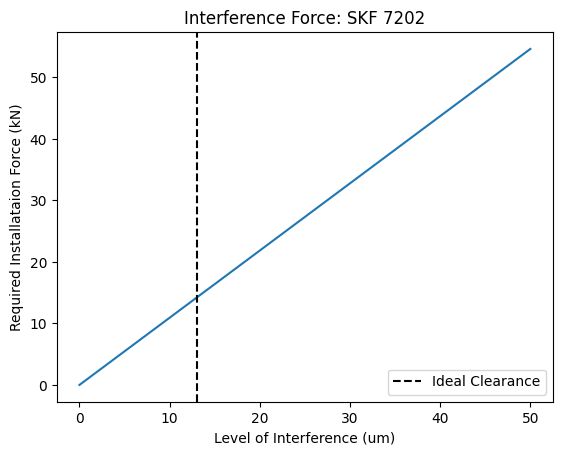

In [44]:
int_array = np.linspace(0,50,100)*1e-6 # Level of Interference Considered

F_array = np.zeros(int_array.size)

D_7202 = 15e-3

L_7202 = 11e-3

A_7202 = np.pi * D_7202 * L_7202

mu_7202 = 0.15

for index, int in np.ndenumerate(int_array):

    p = (int/D_7202) * (E_shaft / (1 - v**2))

    F_array[index] = p * A_7202 * mu_7202


plt.plot(int_array*1e6, F_array/1e3)
plt.xlabel("Level of Interference (um)")
plt.ylabel("Required Installataion Force (kN)")
plt.title("Interference Force: SKF 7202")

plt.axvline(13, linestyle="--", color="k", label="Ideal Clearance")

plt.legend()


##### 3.4.2.2 - Turbine Bearings: SKF 6004

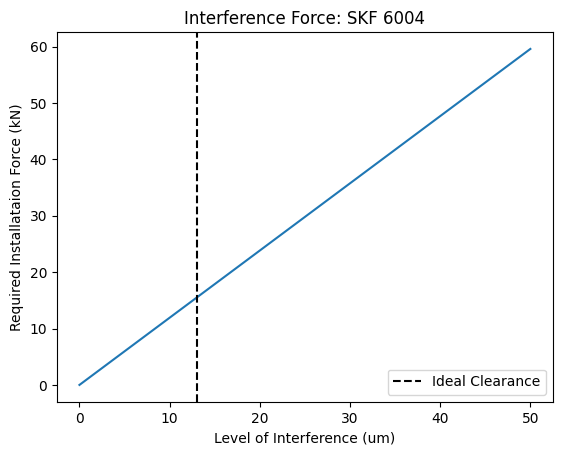

In [46]:
int_array = np.linspace(0,50,100)*1e-6 # Level of Interference Considered

F_array = np.zeros(int_array.size)

D_6004 = 20e-3

L_6004 = 12e-3

A_6004 = np.pi * D_6004 * L_6004

mu_6004 = 0.15

for index, int in np.ndenumerate(int_array):

    p = (int/D_6004) * (E_shaft / (1 - v**2))

    F_array[index] = p * A_6004 * mu_6004


plt.plot(int_array*1e6, F_array/1e3)
plt.xlabel("Level of Interference (um)")
plt.ylabel("Required Installataion Force (kN)")
plt.title("Interference Force: SKF 6004")

plt.axvline(13, linestyle="--", color="k", label="Ideal Clearance")

plt.legend()

##### 3.4.2.3 - Available Force for Press Fitting

The intended method for the press-fitting of the bearings will be by using a hammer, meaning that the impact force will likely be high but the nammer of smacks inorder to get the press fit will vary as a function of the required press fitting force.

We can model the expected force we can induce by the hammer by considering the kinetic energy we can imply on the hammer, and the transmission duration. Based on [this video](https://www.youtube.com/watch?v=8RUev9E5KDE), we can see that the typical hammer blow can achieve the following parameters:

- Velocity: 6.5 m/s
- Mass: 0.8 kg

From this, we can evaluate for the kinetic energy of the hammer as follows:

$$K = \frac{1}{2} m v^2$$

And we can evaluate the average hammer blow force assuming all kinetic energy is directed into our component:

$$F = \frac{K}{d}$$

We can re-arrange our last expression get an idea of the ditance travel of the component during the hammer blow based on the kinetic energy and required force:

$$d = \frac{K}{F}$$

We can then plug in our force relationship for the interference fit which we can simplify to the following:

$$F = \delta \pi L \mu \frac{E}{1 - \nu^2}$$

$$d = \frac{K}{\delta \pi L \mu \frac{E}{1 - \nu^2}}$$

We can evaluate for the number of hits needed to meet the length requirement of the system as follows:

$$N = \frac{L}{d}$$

$$N = \delta \pi L^2 \mu \frac{E}{(1 - \nu^2) K}$$

Running this case for our two bearings, we get the following:

16.900000000000002


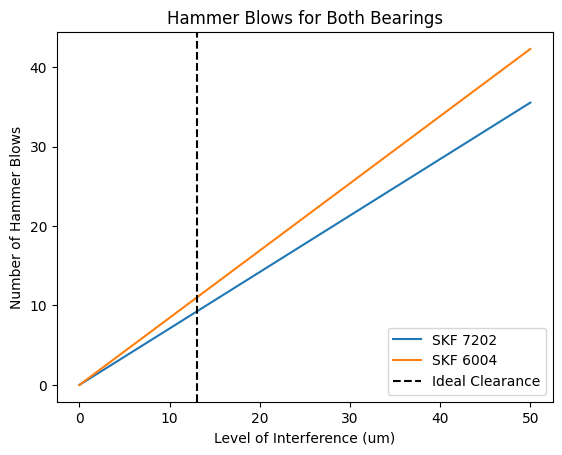

In [49]:
int_array = np.linspace(0, 50, 100) * 1e-6  # Level of Interference Considered

N_7202 = np.zeros(int_array.size)
N_6004 = np.zeros(int_array.size)

m_hammer = 0.8
v_hammer = 6.5

K = (1/2) * m_hammer * v_hammer**2

print(K)

L_7202 = 11e-3

L_6004 = 12e-3

mu_6004 = 0.15

mu_7202 = 0.15

for index, int in np.ndenumerate(int_array):

    N_6004[index] = int * np.pi * L_6004**2 * mu_6004 * (E_shaft/(1- v**2)) / K

    N_7202[index] = int * np.pi * L_7202**2 * mu_7202 * (E_shaft / (1 - v**2)) / K


plt.plot(int_array * 1e6, N_7202, label= "SKF 7202")
plt.plot(int_array * 1e6, N_6004, label= "SKF 6004")
plt.xlabel("Level of Interference (um)")
plt.ylabel("Number of Hammer Blows")
plt.title("Hammer Blows for Both Bearings")

plt.axvline(13, linestyle="--", color="k", label="Ideal Clearance")

plt.legend()

##### 3.4.2.4 - Using Shrink/heating to reduce instalation Interference

We can use freezing/heating of components to reduce the instalation interference quite easily, by either taking a blow torch to the bearings or freezing the shaft or both.

We can use linar thermal expansion modelling to evaluate how the dimensions will change as a function of temperature:

$$\delta = \alpha D_o \Delta T$$

Where the symbold have the following meaning:

- $\delta$: Change in Diameter (m)
- $\alpha$: Thermal Expansion Coeffienty (1/K)
- $D_o$: Nominal Diameter of the component (m)
- $\Delta T$: Change in Temperature of the component (K)

We can assume that everything is made of stainless steel 304 and use the [following website](https://www.azom.com/properties.aspx?ArticleID=965) to get the thermal expansion coefficient:

- Thermal Expansion Coefficient: 16e-6 /K

We can then make a plot to get an idea of the diameteral changes we can introduce through temperature variations.

The following assumptions have been made:

- Refigerator Temperature: 3 C
- Freezer Temperature: -18 C
- Room Temperature: 20 C

We also know that most Airfryers can heat up products at a controlled temperature of 80 C, which is inline with [SKF's maximum temperature recomendations](https://www.skf.com/group/products/mounted-bearings/ball-bearing-units/take-up-ball-bearing-units/temperature-limits)



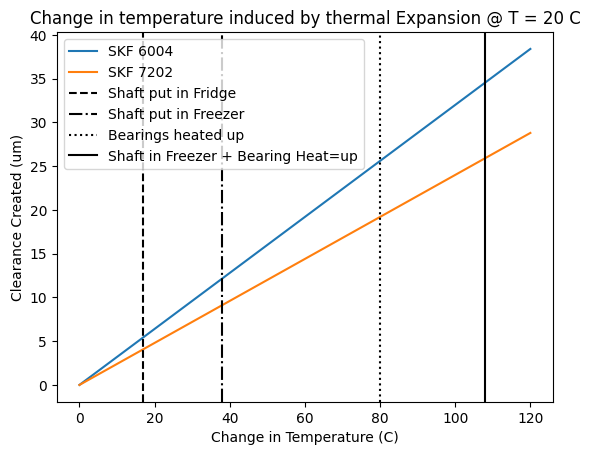

In [60]:
alpha = 16e-6

D_7202 = 15e-3
D_6004 = 20e-3

delta_t = np.linspace(0,120,100)

d_con_7202 = np.zeros(delta_t.size)
d_con_6004 = np.zeros(delta_t.size)

for index, t in np.ndenumerate(delta_t):

    d_con_7202[index] = alpha * D_7202 * t
    d_con_6004[index] = alpha * D_6004 * t

plt.plot(delta_t, d_con_6004 * 1e6, label="SKF 6004")
plt.plot(delta_t, d_con_7202 * 1e6, label="SKF 7202")

plt.xlabel("Change in Temperature (C)")
plt.ylabel("Clearance Created (um)")

plt.title("Change in temperature induced by thermal Expansion @ T = 20 C")

plt.axvline(17, label="Shaft put in Fridge", linestyle="--", color="k")
plt.axvline(38, label="Shaft put in Freezer", linestyle="-.", color="k")
plt.axvline(80, label="Bearings heated up", linestyle=":", color="k")

plt.axvline(108, label="Shaft in Freezer + Bearing Heat=up", color="k")


plt.legend()

Based on the analysis, we can see we can conservatively create an additional 20 microns worth of clearance at assembly, which we can use to our advantage in determining our tolerances for the bearing.

#### 3.4.3 - Final Fit Tolerances

Based on the maximum tolerances that are available for the manufacturing, plus the evaluation we have had on how challenging it would be to install interms of hammer blows, we can set the following criteria:

- Maximum Number of Blows: 5
- Maximum Interferance at Installation: 5 um
- Thermal Method: Freezer + Heated Bearing
- Thermal Clearance we can Introduce: 20 um

From here, we know what the inner race tolerances of the bearings are, we can then specify a set of tolerances for the shaft diameter to give us a good workable interference fit accordingly.

| Bearing  | Min ID | Max ID | Shaft Tolerance | Shaft Min OD | Shaft Max OD | Max clear. | Max Inter. | Max Inter at Install |
| -------- | ------ | ------ | --------------- | ------------ | ------------ | ---------- | ---------- | -------------------- |
| SKF 7202 | 14.992 | 15.000 | +/- 0.05        | 14.92        | 15.02        | 80 um      | 28 um      | 8 um                |
| SKF 6004 | 19.992 | 20.00  | +/- 0.05        | 19.92        | 20.02        | 80 um      | 28 um      | 8 um |

### 3.5 - Bearing Shoulder Requirements

For the shaft, there are minimum shoulders required for the bearing to sit correctly.

SKF have provided minimum specifications for these shoulders on their websites. We will employ the use of standard ISO 2768-1 for ensuring these dimensions are met.

#### 3.5.1 - Pump Bearing: SKF 7202

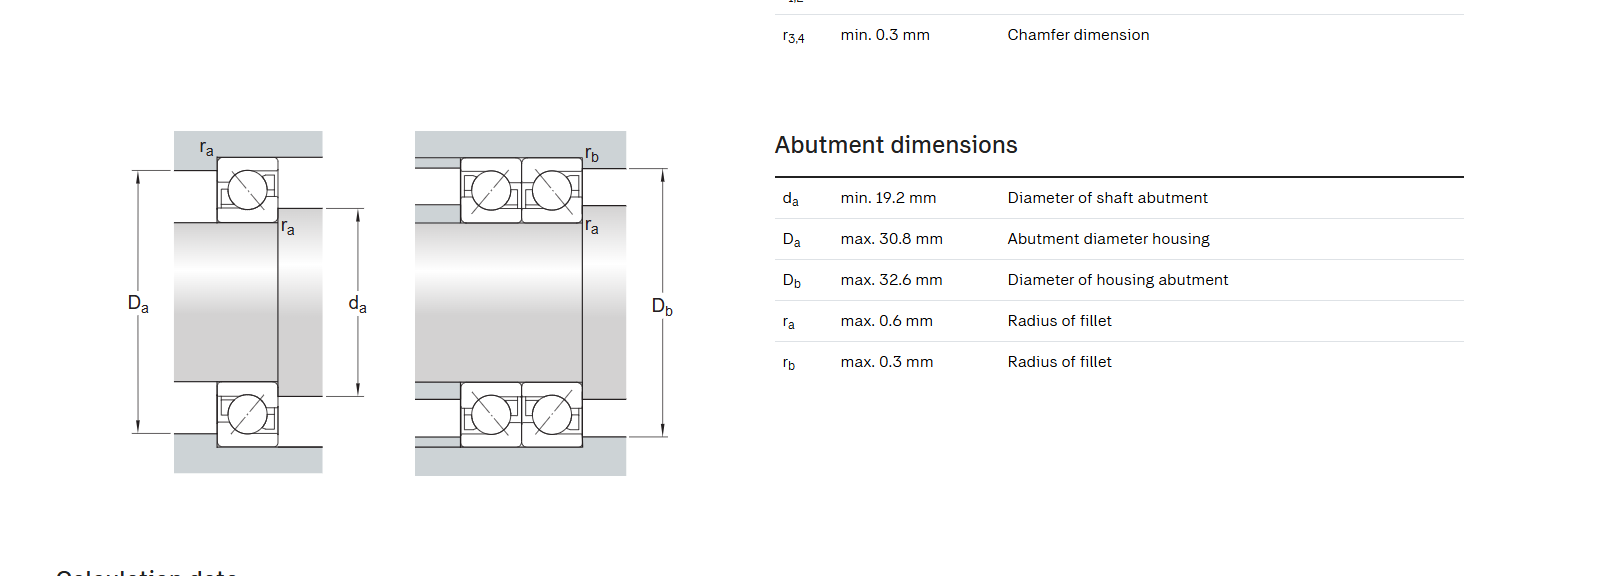

For the inner shoulder, we can see that the minimum shoulder height is 19.2 mm.
As we are using this bearing in a tandem pair, we can see that the maximum outer race shoulder is 32.6 mm.

ISO 2768-1 specifies a tolerance range of +/- 0.2 mm at this dimensional length, hence we can define our shoulder dimensions. For the shoulder rad

| Dimensions            | Nominal | Tolerance | Max  | Min  |
| --------------------- | ------- | --------- | ---- | ---- |
| Inner Shoulder        | 19.4    | +/- 0.2   | 19.6 | 19.2 |
| Outer Shoulder        | 32.4    | +/- 0.2   | 32.6 | 32.2 |
| Inner Shoulder Radius | -       | -         | 0.6  | -    |
| Outer Shoulder Radius | -       | -         | 0.3  | -    |


#### 3.5.2 - Turbine Bearing: SKF 6004

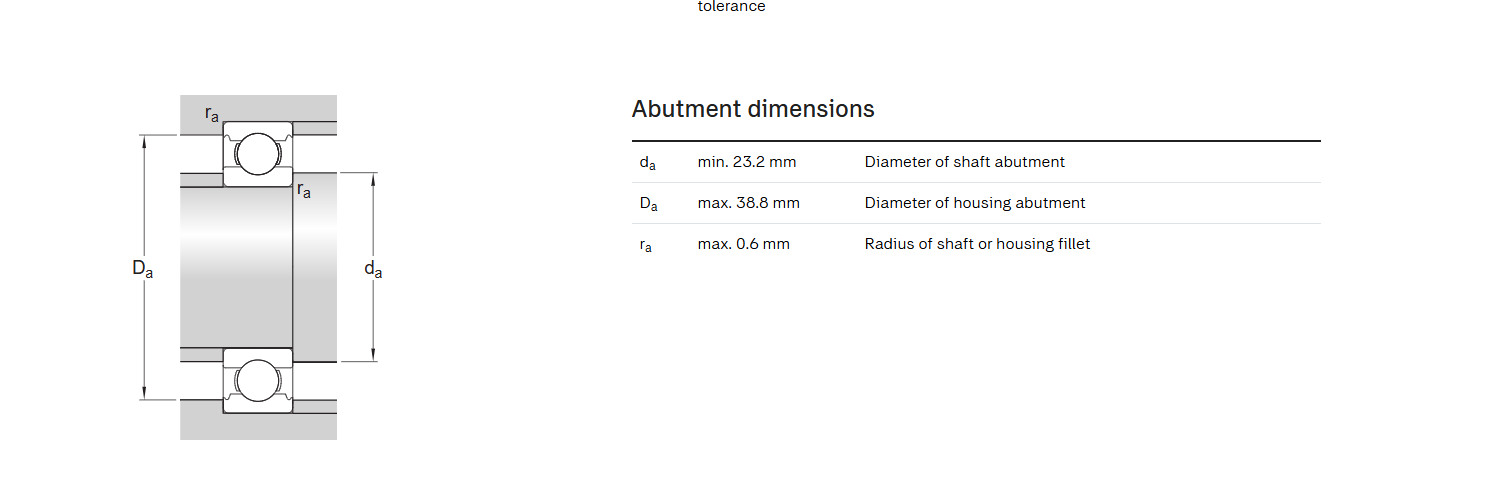

For the inner shoulder, we can see that a minimum diameter of 23.2 mm is needed, along with a maximum outer shoulder diameter of 38.8 mm.

From this we can define our shaft tolerances as the following:

| Dimensions       | Nominal | Tolerance | Max  | Min  |
| ---------------- | ------- | --------- | ---- | ---- |
| Insider Shoulder | 23.4    | +/- 0.2   | 23.6 | 23.2 |
| Outside Shoulder | 35      | +/- 0.2   | 35.2 | 34.8
 |
| Shoulder Radius  | -       | -         | 0.6  | -    |